# Real estate dataset in lasso

#### import packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### read files

In [2]:
df = pd.read_csv('Real estate.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.shape

(414, 8)

### visualisation

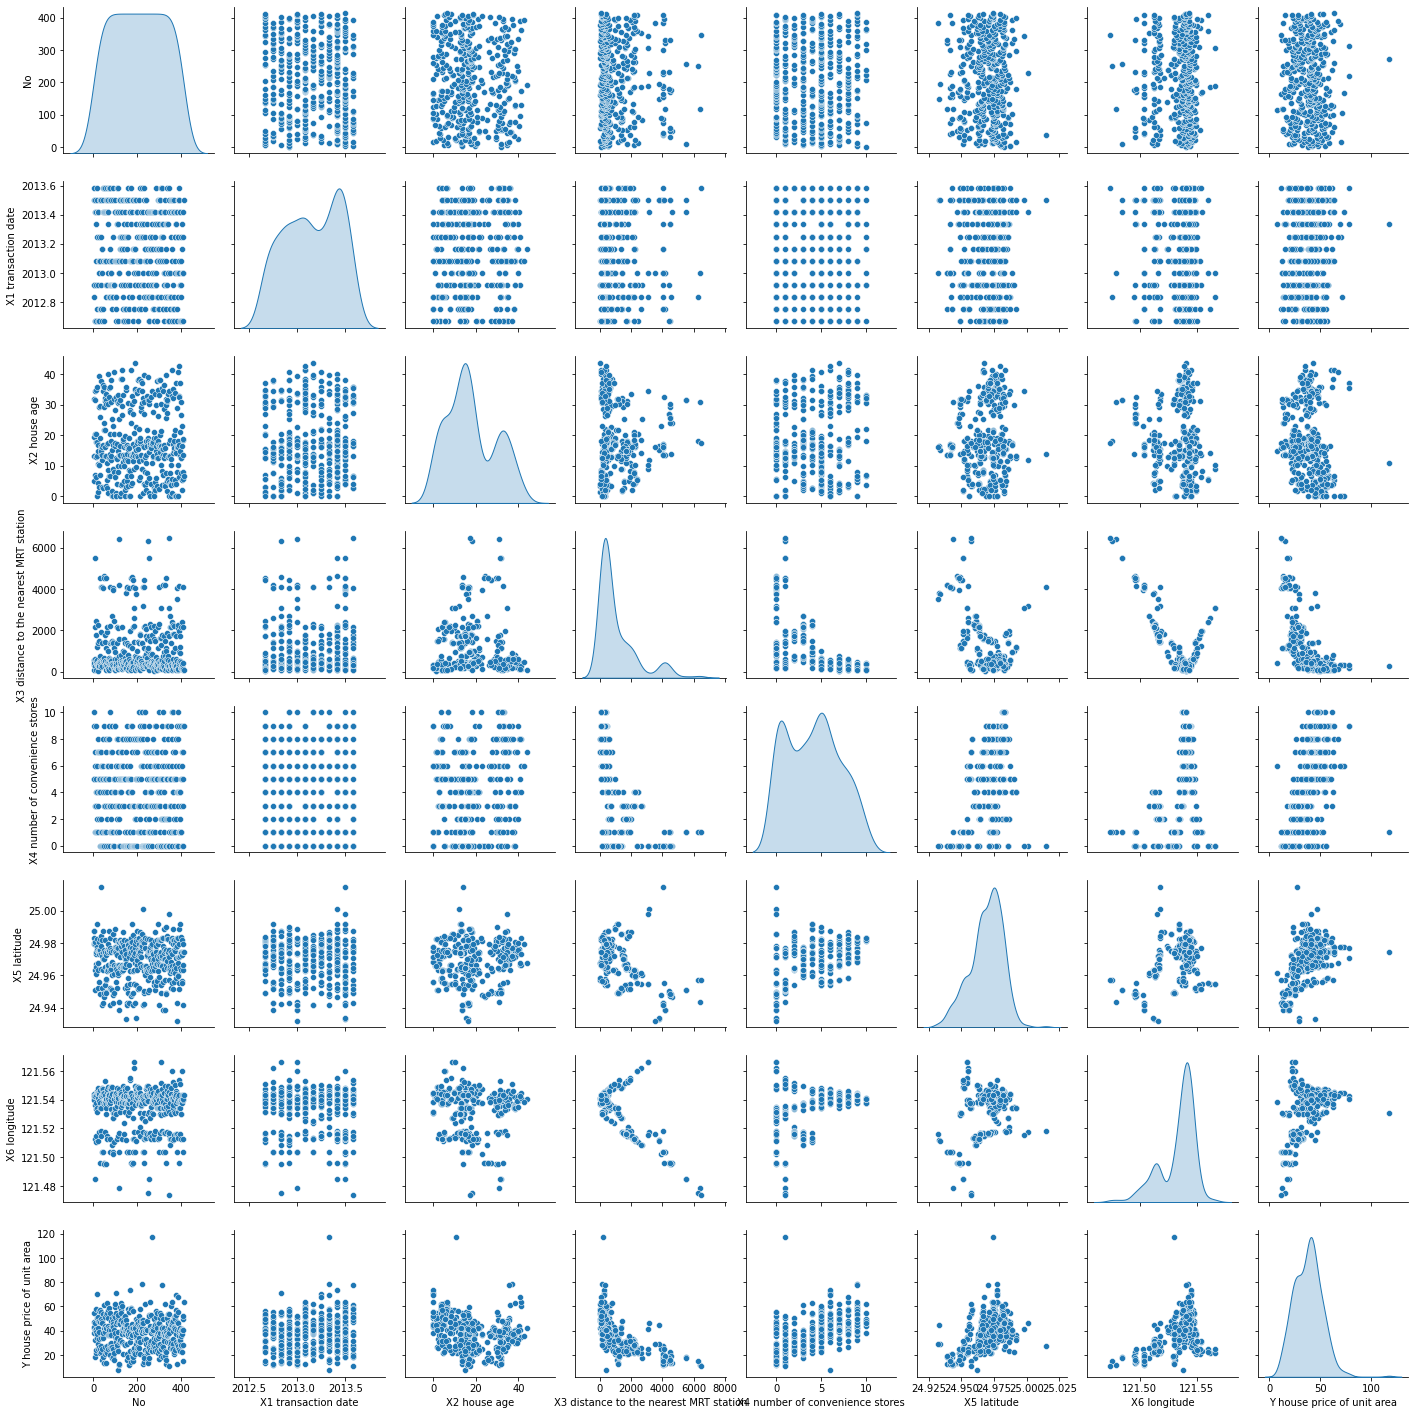

In [6]:
sns.pairplot(df,diag_kind='kde')

In [7]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


### Split data as X & Y

In [8]:
X=df.drop('Y house price of unit area', axis=1)
y=df['Y house price of unit area']

In [9]:
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [10]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 0)

In [12]:
X_train

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
302,303,2013.500,16.5,2288.01100,3,24.95885,121.51359
20,21,2013.417,4.5,2275.87700,3,24.96314,121.51151
303,304,2013.500,38.3,439.71050,0,24.97161,121.53423
142,143,2013.417,19.8,640.60710,5,24.97017,121.54647
14,15,2013.500,13.2,1164.83800,4,24.99156,121.53406
...,...,...,...,...,...,...,...
323,324,2013.417,28.6,197.13380,6,24.97631,121.54436
192,193,2013.167,43.8,57.58945,7,24.96750,121.54069
117,118,2013.000,13.6,4197.34900,0,24.93885,121.50383
47,48,2013.583,35.9,640.73910,3,24.97563,121.53715


In [13]:
X_test

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
356,357,2012.833,10.3,211.4473,1,24.97417,121.52999
170,171,2013.333,24.0,4527.6870,0,24.94741,121.49628
224,225,2013.333,34.5,324.9419,6,24.97814,121.54170
331,332,2013.333,25.6,4519.6900,0,24.94826,121.49587
306,307,2013.500,14.4,169.9803,1,24.97369,121.52979
...,...,...,...,...,...,...,...
308,309,2013.417,16.4,289.3248,5,24.98203,121.54348
100,101,2013.500,17.5,964.7496,4,24.98872,121.53411
7,8,2013.417,20.3,287.6025,6,24.98042,121.54228
22,23,2012.917,14.7,1360.1390,1,24.95204,121.54842


### Model building

In [14]:
from sklearn.linear_model import Lasso

In [15]:
model = Lasso(alpha = 0.1,normalize=True)

In [16]:
model.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.1, normalize=True)

In [17]:
#prediction
y_pred = model.predict(X_test)

### Model evaluation

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y_test,y_pred)

0.5822630474750521